In [41]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

import matplotlib.pyplot as plt
from env import host, user, password
from pydataset import data
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [42]:
# get and prepare titanic data
titanic_df = acquire.new_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


In [43]:
# prep and create our train, validate and test dataframes / creates dummies 
# for string catagoricals - already removed what was not needed in prepare.py
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,Q,S,male
583,0,1,36.000000,0,0,40.1250,1,0,0,1
337,1,1,41.000000,0,0,134.5000,1,0,0,0
50,0,3,7.000000,4,1,39.6875,0,0,1,1
218,1,1,32.000000,0,0,76.2917,1,0,0,0
31,1,1,29.916875,1,0,146.5208,0,0,0,0


In [44]:
# this is to make sure they are number format
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  497 non-null    int64  
 1   pclass    497 non-null    int64  
 2   age       497 non-null    float64
 3   sibsp     497 non-null    int64  
 4   parch     497 non-null    int64  
 5   fare      497 non-null    float64
 6   alone     497 non-null    int64  
 7   Q         497 non-null    uint8  
 8   S         497 non-null    uint8  
 9   male      497 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.5 KB


1.  What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [45]:
train.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,Q,S,male
583,0,1,36.0,0,0,40.1250,1,0,0,1
337,1,1,41.0,0,0,134.5000,1,0,0,0
50,0,3,7.0,4,1,39.6875,0,0,1,1


In [46]:
X_train = train.drop(columns = ['survived']) # to do everything but the dropped columns
y_train = train.survived

X_validate = validate.drop(columns = ['survived'])
y_validate = validate.survived

X_test = test.drop(columns = ['survived'])
y_test = test.survived

In [47]:
# create baseline model to compare

train.survived.value_counts()  # we can see that we have 307 ppl that did not survive

0    307
1    190
Name: survived, dtype: int64

In [48]:
# create baseline column with most frequent answer, this is adding column

train['baseline'] = 0

In [49]:
train.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,Q,S,male,baseline
583,0,1,36.0,0,0,40.1250,1,0,0,1,0
337,1,1,41.0,0,0,134.5000,1,0,0,0,0
50,0,3,7.0,4,1,39.6875,0,0,1,1,0


In [50]:
# passing parameters with the column that was just made 'baseline'

baseline_class_report = classification_report(train.survived, train.baseline, zero_division=True)
print(baseline_class_report)


# Our accuracy is 62% accurate

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       1.00      0.00      0.00       190

    accuracy                           0.62       497
   macro avg       0.81      0.50      0.38       497
weighted avg       0.76      0.62      0.47       497



In [74]:
model1 = DecisionTreeClassifier(max_depth = 2)
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 79.07%
validate score: 78.04%


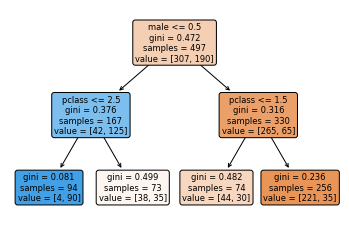

<Figure size 2160x1152 with 0 Axes>

In [79]:
plot_tree(model1, feature_names=X_train.columns.tolist(), filled=True, rounded=True)
plt.figure(figsize=(30,16))
plt.show()

In [6]:
# this is just for reference to see the size of each

train.shape, validate.shape, test.shape

((497, 10), (214, 10), (178, 10))

In [7]:
train.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'Q',
       'S', 'male'],
      dtype='object')

In [81]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,Q,S,male,baseline
583,0,1,36.000000,0,0,40.1250,1,0,0,1,0
337,1,1,41.000000,0,0,134.5000,1,0,0,0,0
50,0,3,7.000000,4,1,39.6875,0,0,1,1,0
218,1,1,32.000000,0,0,76.2917,1,0,0,0,0
31,1,1,29.916875,1,0,146.5208,0,0,0,0,0


2.  Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [9]:
# this is what we worked on yesterday

3.  Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [80]:
y_pred = model1.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [82]:
y_pred_proba = model1.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.59459459, 0.40540541],
       [0.04255319, 0.95744681],
       [0.86328125, 0.13671875],
       [0.04255319, 0.95744681],
       [0.04255319, 0.95744681]])

4.  Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [83]:
# Accuracy

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 79.07%
validate score: 78.04%


In [86]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(303, 4, 100, 90)

In [87]:
#confusion matrix explaination

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 90
False Positives 4
False Negatives 100
True Negatives 303
-------------
Accuracy is 0.7907444668008048
Recall is 0.47368421052631576
Precision is 0.9574468085106383


In [84]:
# Confusion Matrix

confusion_matrix(y_train, y_pred)

array([[303,   4],
       [100,  90]])

In [85]:
y_train.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [88]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       307
           1       0.96      0.47      0.63       190

    accuracy                           0.79       497
   macro avg       0.85      0.73      0.74       497
weighted avg       0.83      0.79      0.77       497



In [89]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(model1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.78


5.  Run through steps 2-4 using a different max_depth value.

In [10]:
# going through steps 1-4 again

In [90]:
model2 = DecisionTreeClassifier(max_depth = 4)
model2.fit(X_train, y_train)

print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

training score: 83.50%
validate score: 78.50%


6.  Which model performs better on your in-sample data?

7.  Which model performs best on your out-of-sample data, the validate set?

### Random Forest

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
# only difference is you wont be able to print trees - even in cirriculum and
# madeleines it will be step by step


2.  Evaluate your results using the model score, confusion matrix, and classification report.

3.  Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

5.  What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?